# NNW-Übung 2

In [1]:
import numpy as np
import numpy

## 1 Arbeiten mit Python und NumPy - Teil 2

In [2]:
x=np.array([1.,2,3]) # Der Punkt bewirkt Datentyp float.
x

array([1., 2., 3.])

In [3]:
W=np.array([[1.,2,3],[4,3,2]])
W

array([[1., 2., 3.],
       [4., 3., 2.]])

In [4]:
x.shape

(3,)

In [5]:
W.shape

(2, 3)

In [6]:
W.dot(x)   # Matrix * Vektor (!!)

array([14., 16.])

In [7]:
W*W        # elementweise Multiplikation (!!)

array([[ 1.,  4.,  9.],
       [16.,  9.,  4.]])

In [8]:
# W.dot(W)   # geht nicht: warum?

In [9]:
W.T

array([[1., 4.],
       [2., 3.],
       [3., 2.]])

In [10]:
x.T                 # seltsam ...? Logik: 1D bleibt 1D. x ist *kein* Spalten-Vektor!

array([1., 2., 3.])

In [11]:
y=x[np.newaxis].T # erzeugt (a) 2D Matrix 1x3 (=Zeilenvektor!), (b) transponiert sie.
y

array([[1.],
       [2.],
       [3.]])

In [12]:
y.shape

(3, 1)

In [13]:
x2=np.array([[1.,2,3]]) # *eine* Zeile einer *2D*-Matrix
x2.shape

(1, 3)

In [14]:
y2=x2.T
y2

array([[1.],
       [2.],
       [3.]])

In [15]:
y2.shape

(3, 1)

In [16]:
r1D=W.dot(x)
r1D.shape

(2,)

In [17]:
r2D=W.dot(y2) # vgl r1D
r2D.shape     # vgl r1D

(2, 1)

In [18]:
#W+r1D        # geht nicht: warum?
W+r2D  # numpy addiert Vektor zu allen Spalten!

array([[15., 16., 17.],
       [20., 19., 18.]])

### max // argmax // sum

In [19]:
W

array([[1., 2., 3.],
       [4., 3., 2.]])

In [20]:
W.max()

4.0

In [21]:
W.max(0)

array([4., 3., 3.])

In [22]:
W.max(1)

array([3., 4.])

In [23]:
W.argmax(0)

array([1, 1, 0], dtype=int64)

In [24]:
W.argmax(1)

array([2, 0], dtype=int64)

In [25]:
W.sum()

15.0

In [26]:
W.sum(0)

array([5., 5., 5.])

In [27]:
W.sum(1)

array([6., 9.])

### Klassen in Python

* Zu Klassen siehe https://docs.python.org/2/tutorial/classes.html
* und insbesondere https://docs.python.org/2/tutorial/classes.html#tut-private

In [28]:
class myclass:
    W=0                   # Instanzvariable
    _privateW=1           # Konvention: private Variablen beginnen mit _
    def f(self):          # self muss explizit übergeben werden, sonst "static"
        return self.W*2   # self muss auch beim Zugriff immer angegeben werden

    def __init__(self,W): # Konstruktor
        self.W=W

m=myclass(np.array([-1,1]))

In [29]:
m.W

array([-1,  1])

In [30]:
m.f()

array([-2,  2])

## 2 Klasse für ein einschichtiges Netz

Erstellen Sie eine Klasse `SLN` (für single-layer network) für ein einschichtiges Netz.

1. Implementieren Sie einen Konstruktor, der die folgenden Parameter erhält:

   * `dIn`: Anzahl der Eingabe-Werte (in der Vorlesung mit `d` (bzw. `dk`)        bezeichnet)

   * `cOut`: Anzahl der Neuronen/Ausgabe-Werte (in der Vorlesung mit `c`          bezeichnet)
   
   und der außerdem die folgenden Instanz-Variablen initialisiert:

   * `_W`: Matrix der Gewichte (ohne Bias!). Initialisieren Sie `_W` mit          zufälligen, normalverteilten Werten initialisiert (mit                        `numpy.random.randn`). Initialisieren Sie den Zufallsgenerator vorher        durch den Aufruf `numpy.random.seed(42)`, um reproduzierbare Ergebnisse      zu erhalten.
     Teilen Sie die generierten Zufallszahlen durch die Wurzel aus `dIn+1`.

   * `_b`: (Spalten-)Vektor mit den Bias-Gewichten. Initialisieren Sie            `_b=~0` (mit `numpy.zeros`).
     Achten Sie darauf, dass Sie wirklich einen Spaltenvektor erzeugen! Tipp:      aus einem 1DVektor `v` erhalten Sie (siehe Aufgabe 1) einen                  Spaltenvektor mit `v=v[np.newaxis].T`.

In [31]:
numpy.random.seed(42)

In [32]:
class SLN:
    def __init__(self,dIn,cOut):
        self.dIn  = dIn
        self.cOut = cOut
        self._W   = np.random.randn(dIn)/np.sqrt(dIn+1)
        self._b   = np.array([np.zeros(dIn)]).T

2. Kopieren Sie Ihre Funktion `neuron(X)` von dem vorigen Aufgabenblatt in      die Klasse. Ändern Sie die Funktion so ab, dass sie die Instanzvariable      `_W` benutzt (und überhaupt benutzen kann), wobei Sie für diese Aufgabe      weiter davon ausgehen können, dass nur ein Neuron (`cOut=1`) verwendet        wird. Ergänzen Sie die Verwendung des Bias `_b`. Dazu sollten jeweils nur    wenige Zeichen nötig sein.

In [33]:
# Neuron aus P1

def neuron(X):
    N=X.shape[0]
    net=np.zeros(N)
    W=[-0.3,1]
    for n in range(0,N):
        for j in range(0,X.shape[1]):
            net[n]+=W[j]*X[n,j]
    return net>2

### Lösung

In [34]:
class SLN:
    def __init__(self,dIn,cOut):
        self.dIn  = dIn
        self.cOut = cOut
        self._W   = np.array([np.random.randn(dIn)/np.sqrt(dIn+1)]).T
        self._b   = np.array([np.zeros(dIn)]).T
    
    def neuron(self,X):
        N=X.shape[1]
        net=np.zeros(N)
        
        for n in range(0,N):
            for j in range(0,self.dIn):
                net[n] += self._b[j,0] + self._W[j,0] * X[j, n]
        return net>2

3. Testen Sie, ob Ihre neue Klasse bei den Experimenten des letzten Aufgabenblattes dieseleben Ergebnisse liefert. Setzen Sie dazu (entgegen der Konvention) die eigentlich privaten Variablen `_W` und `_b` entsprechend.

In [35]:
# based on: https://github.com/eakbas/tf-svm/blob/master/plot_boundary_on_data.py
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors


def plotTwoFeatures(X,T,pred_func):
    if X.ndim!=2:
        raise ValueError('X be a matrix (2 dimensional array).')
    # if X.shape[0]!=2: 
    #    X=X.T
    if X.shape[0]!=2:
        raise ValueError('X must contain exactly 2 features.')
        
    # determine canvas borders
    mins = np.amin(X,1); 
    mins = mins - 0.1*np.abs(mins);
    maxs = np.amax(X,1); 
    maxs = maxs + 0.1*maxs;

    ## generate dense grid
    xs,ys = np.meshgrid(np.linspace(mins[0],maxs[0],300), 
            np.linspace(mins[1], maxs[1], 300));

    # evaluate model on the dense grid
    try:
        Z = pred_func(np.c_[xs.flatten(), ys.flatten()].T);
    except:
        Z = pred_func(np.c_[xs.flatten(), ys.flatten()]);
    
    if Z.ndim>1 and Z.shape[0]>1: # onehot? -> convert
        Z=Z.argmax(0)
    Z = Z.reshape(xs.shape)
    
    if T.ndim>1 and T.shape[0]>1: # onehot? -> convert
        T=T.argmax(0)
        
    # Plot the contour and training examples
    plt.contourf(xs, ys, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=T, s=50,
            cmap=colors.ListedColormap(['orange', 'blue', 'green']))
    plt.show()

In [36]:
class SLN_P1:
    def __init__(self,dIn,cOut):
        self.dIn  = dIn
        self.cOut = cOut
        self._W   = np.array([[-0.3,1]]).T
        self._b   = np.array([np.zeros(cOut)]).T
    
    def neuron(self,X):
        N=X.shape[1]
        net=np.zeros(N)
        for n in range(0,N):
            for j in range(0,self.dIn):
                net[n] += self._b[0,0] + self._W[j,0] * X[j, n]
        return net>2

In [37]:
array=np.loadtxt('iris.csv', delimiter=',')
t=array[:,[4]].T[0]
x=array[:,[0,1,2,3]]
X = x[:,[0,1]]

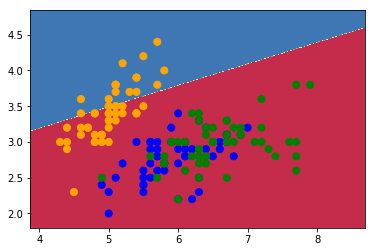

In [38]:
sln_p1 = SLN_P1(X.shape[1],1)

plotTwoFeatures(X.T,t,sln_p1.neuron)

=> Ergebniss ist identisch, siehe hierzu _P1 - Neuron mit voreingestellten Gewichten_

4. Die auf der nächsten Seite definierte globale Funktion `ErrorRate(Y, T)`      soll die Fehlklassifikationsrate ausrechnen. Die Fehlklassifikationsrate      ist die Anzahl der inkorrekt klassifizierten Trainingsmuster dividiert        durch die Gesamtanzahl der Trainingsmuster. Vollziehen Sie die Funktion      nach.

In [39]:
def ErrorRate(Y,T):
    if Y.ndim==1 or Y.shape[0]==1:
        errors=Y!=T
        return errors.sum()/Y.size
    else: # für mehrere Ausgaben in one-hot Kodierung:
        errors=Y.argmax(0)!=T.argmax(0)
        return errors.sum()/Y.shape[1]

5. Kopieren Sie Ihre Funktion `neuron(X)` unter den Namen                        `neuron_mit_for(X)`. Ersetzen Sie in `neuron(X)` die for-Schleifen durch      eine Matrixmultiplikation. Prüfen Sie, dass beide Funktionen dieselben        Ergebnisse liefern.

In [59]:
class SLN:
    def __init__(self,dIn,cOut):
        self.dIn  = dIn
        self.cOut = cOut
        self._W   = np.random.randn(cOut,dIn)/np.sqrt(dIn+1)
        self._b   = np.zeros(cOut)[np.newaxis].T
    
    def neuron_mit_for(self,X):
        N=X.shape[1]
        net=np.zeros(N)
        for n in range(0,N):
            for j in range(0,X.shape[0]):
                net[n] += self._W[j] * X[j, n]
        net+=self._b
        return net>2
    
    def neuron(self,X):
        net=self._W.dot(X)+self._b
        return net>2

In [60]:
iris = np.loadtxt("iris.csv",delimiter=',')
X=iris[:,0:4].T
T=iris[:,4]

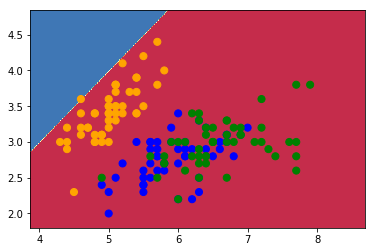

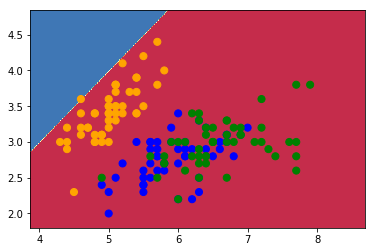

In [62]:
sln=SLN(2,1)
sln._W=np.array([-1,1])
sln._b=np.array([3])

plt.figure()
plotTwoFeatures(X[:2,:],T,sln.neuron)

plt.figure()
plotTwoFeatures(X[:2,:],T,sln.neuron_mit_for)

## 3 Delta-Regel

1. Implementieren Sie die Delta-Regel als Methode `DeltaTrain` der Klasse        `SLN` mit den Parametern `X` und `T` für die Trainingsbeispiele, etwa für    die Lernrate `η`, `maxIter` für die maximale Anzahl Iterationen und          `maxErrorRate` für die maximale Fehlklassifikationsrate.

   Der Bias `b` soll mit trainiert werden, also genauso behandelt werden wie    die übrigen Gewichte.
   Implementieren Sie das Verfahren als Batch-Learning.

   Der Lernvorgang soll abgebrochen werden, wenn entweder die maximale Anzahl    `maxIter` Iterationen (Lernzyklen, Epochen) erreicht oder die maximale        Fehlklassifikationsrate `maxErrorRate` unterschritten wurde.

   Tipp (optional): Sie brauchen für diese Funktion nur eine einzige            Schleife, wenn Sie überall Matrix-Multiplikationen verwenden (und            entsprechend nirgendwo auf einzelne Elemente der Matrizen zugreifen). Die    bei Batch Learning in den Lernregeln auftretende Summe über alle              Trainingsdaten `n = 1..N` ergibt sich also auch durch eine Matrix-            Multiplikation. Am einfachsten finden Sie diese Lösung, wenn Sie die Regel    für die Multiplizierbarkeit von zwei Matrizen und die dabei auftretenden      Dimensionen betrachten: `C = A·B`, Dimensionen: 
   `(c x d) = (c x n) · (n x d)`.
   Weiterer Tipp: Eine Matrix müssen Sie transponieren. Für x0 darauf achten,    dass es transponiert werden kann: `x0 = np.ones(N)[np.newaxis]`.

In [115]:
import copy
import matplotlib.pyplot as plt

class SLN:
    def __init__(self,dIn,cOut):
        self.dIn  = dIn
        self.cOut = cOut
        self._W   = np.random.randn(cOut,dIn)/np.sqrt(dIn+1)
        self._b   = np.zeros(cOut)[np.newaxis].T
    
    def neuron_mit_for(self,X):
        N=X.shape[1]
        net=np.zeros(N)
        for n in range(0,N):
            for j in range(0,X.shape[0]):
                net[n] += self._W[j] * X[j, n]
        net+=self._b
        return net>2
    
    def neuron(self,X):
        net=self._W.dot(X)+self._b
        return net>2
    
    def deltaTrain(self, X, T, eta, maxIter, maxErrorRate):
        bestIt = 0;
        N=X.shape[1]
        x0 = np.ones(N)[np.newaxis]
        for it in range(maxIter+1):
            Y = self.neuron(X)
            err = ErrorRate(Y, T)
            if (it%20) == 0:
                print('#{} W:{} b:{} err:{}'.format(it,self._W,self._b,err))
            if err <= maxErrorRate:
                break
            self._W+=eta*(T-Y).dot(X.T)/N
            self._b+=eta*(T-Y).dot(x0.T)/N
        print('#{} W:{} b:{} err:{}'.format(bestIt,self._W,self._b,err))
        return bestIt
        

In [88]:
iris = np.loadtxt("iris.csv",delimiter=',')
X=iris[:,0:4].T
T=iris[:,4]

In [116]:
numpy.random.seed(42)

sln = SLN(2,1)
sln.deltaTrain(X[:2,:],t, 0.5, 100, 0.1)

#0 W:[[ 0.28677805 -0.07982693]] b:[[0.]] err:0.6666666666666666
#20 W:[[ 8.45611138 -0.0414936 ]] b:[[0.49666667]] err:0.6666666666666666
#40 W:[[13.72944472 -1.5214936 ]] b:[[0.49666667]] err:0.6666666666666666
#60 W:[[19.00277805 -3.0014936 ]] b:[[0.49666667]] err:0.6666666666666666
#80 W:[[24.27611138 -4.4814936 ]] b:[[0.49666667]] err:0.6666666666666666
#100 W:[[29.54944472 -5.9614936 ]] b:[[0.49666667]] err:0.6666666666666666
#0 W:[[29.81311138 -6.0354936 ]] b:[[0.49666667]] err:0.6666666666666666


0

2. Optional: Lassen Sie sich zudem die Trennlinie nach jedem Lernschritt        (oder einigen Lernschritten) mit `nnwplot.plotTwoFeatures` ausgeben. Damit    der Update des Plots funktioniert, Folgendes beachten:

   * Einmalig (vor der Trainings-Schleife) mit `plt.ion()` den interaktiven        Modus aktivieren.
   * Nach jedem `nnwplot.plotTwoFeatures` Aufruf den Event-Loop der GUI etwas      Zeit geben: `plt.pause(0.05)`.

In [112]:
import copy
import matplotlib.pyplot as plt

class SLN:
    def __init__(self,dIn,cOut):
        self.dIn  = dIn
        self.cOut = cOut
        self._W   = np.random.randn(cOut,dIn)/np.sqrt(dIn+1)
        self._b   = np.zeros(cOut)[np.newaxis].T
    
    def neuron_mit_for(self,X):
        N=X.shape[1]
        net=np.zeros(N)
        for n in range(0,N):
            for j in range(0,X.shape[0]):
                net[n] += self._W[j] * X[j, n]
        net+=self._b
        return net>2
    
    def neuron(self,X):
        net=self._W.dot(X)+self._b
        return net>2
    
    def deltaTrain(self, X, T, eta, maxIter, maxErrorRate):
        bestIt = 0;
        N=X.shape[1]
        x0 = np.ones(N)[np.newaxis]
        for it in range(maxIter):
            Y = self.neuron(X)
            err = ErrorRate(Y, T)
            if (it%20) == 0:
                print('#{} W:{} b:{} err:{}'.format(it,self._W,self._b,err))
                plotTwoFeatures(X,T,self.neuron)
                plt.pause(0.05)
            if err <= maxErrorRate:
                break
            self._W+=eta*(T-Y).dot(X.T)/N
            self._b+=eta*(T-Y).dot(x0.T)/N
        print('#{} W:{} b:{} err:{}'.format(bestIt,self._W,self._b,err))
        plotTwoFeatures(X,T,self.neuron)
        plt.pause(0.05)
        return bestIt
        

In [107]:
iris = np.loadtxt("iris.csv",delimiter=',')
X=iris[:,0:4].T
T=iris[:,4]

#0 W:[[ 0.28677805 -0.07982693]] b:[[0.]] err:0.6666666666666666


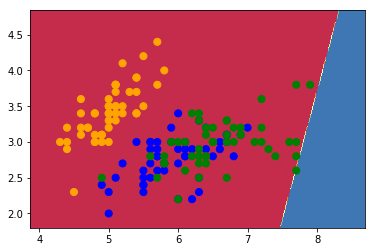

#20 W:[[ 8.45611138 -0.0414936 ]] b:[[0.49666667]] err:0.6666666666666666


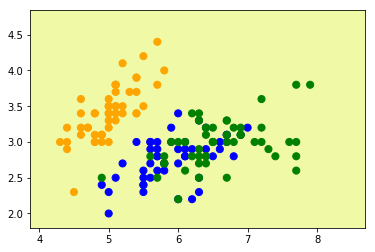

#40 W:[[13.72944472 -1.5214936 ]] b:[[0.49666667]] err:0.6666666666666666


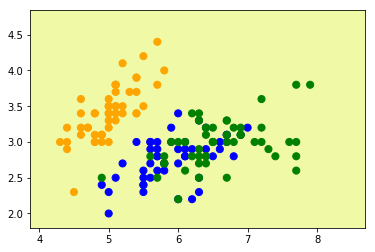

#60 W:[[19.00277805 -3.0014936 ]] b:[[0.49666667]] err:0.6666666666666666


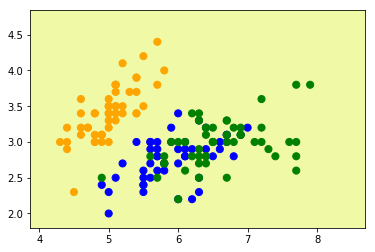

#80 W:[[24.27611138 -4.4814936 ]] b:[[0.49666667]] err:0.6666666666666666


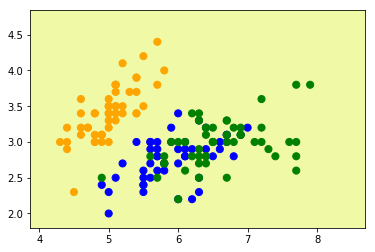

#0 W:[[29.54944472 -5.9614936 ]] b:[[0.49666667]] err:0.6666666666666666


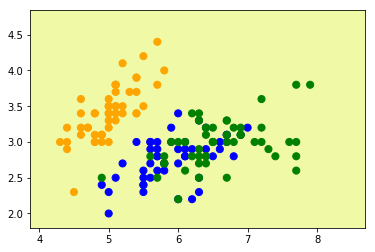

0

In [113]:
numpy.random.seed(42)
# 
sln = SLN(2,1)
sln.deltaTrain(X[:2,:],t, 0.5, 100, 0.6)

3. Optional: Speichern Sie während der Iteration die Gewichte (am Einfachsten die komplette Instanz `self`), die zu dem geringsten Fehler geführt hat, und setzen Sie die Gewichte am Ende auf diese Werte (also nicht (unbedingt) auf die Werte, die am Ende aller Iteration vorliegen).

In [ ]:
import copy
import matplotlib.pyplot as plt

class SLN:
    def __init__(self,dIn,cOut):
        self.dIn  = dIn
        self.cOut = cOut
        self._W   = np.random.randn(cOut,dIn)/np.sqrt(dIn+1)
        self._b   = np.zeros(cOut)[np.newaxis].T
    
    def neuron_mit_for(self,X):
        N=X.shape[1]
        net=np.zeros(N)
        for n in range(0,N):
            for j in range(0,X.shape[0]):
                net[n] += self._W[j] * X[j, n]
        net+=self._b
        return net>2
    
    def neuron(self,X):
        net=self._W.dot(X)+self._b
        return net>2
    
    def deltaTrain(self, X, T, eta, maxIter, maxErrorRate):
        best = self;
        bestError = 2;
        bestIt = 0;
        N=X.shape[1]
        x0 = np.ones(N)[np.newaxis]
        plt.ion() 
        for it in range(maxIter):
            Y = self.neuron(X)
            err = ErrorRate(Y, T)
            if (it%20) == 0:
                print('#{} {} {} {}'.format(it,self._W,self._b,err))
                plotTwoFeatures(X,T,self.neuron)
                plt.pause(0.05)
            if err<bestError:
                bestError = err
                best = copy.copy(self)
                bestIt = it
            if err <= maxErrorRate:
                break
            self._W+=eta*(T-Y).dot(X.T)/N
            self._b+=eta*(T-Y).dot(x0.T)/N
        self._W=best._W
        self._b=best._b
        print('#{} {} {} {}'.format(bestIt,self._W,self._b,err))
        plotTwoFeatures(X,T,self.neuron)
        plt.pause(0.05)
        return bestError, bestIt
        

4. Trainieren Sie ein _Netz_ für das UND-Gatter-Problem.

In [75]:
Xund=np.array([[0,0,1,1],[0,1,0,1]])
Tund=np.array([0,0,0,1])

#0 [[ 0.28677805 -0.07982693]] [[0.]] 0.25


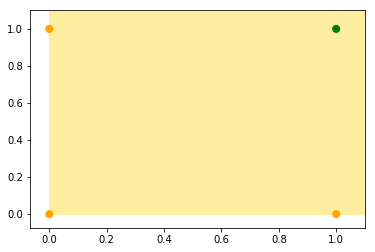

#20 [[0.78677805 0.42017307]] [[0.5]] 0.25


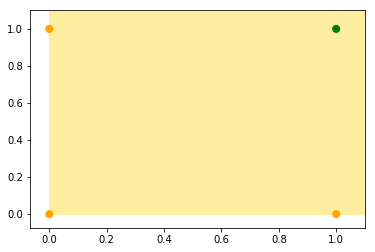

#24 [[0.88677805 0.52017307]] [[0.6]] 0.0


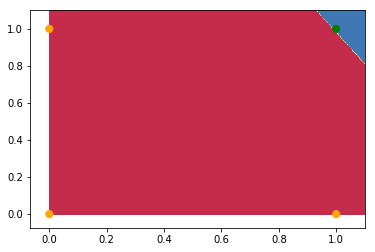

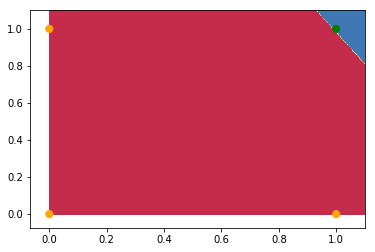

In [78]:
numpy.random.seed(42)

plt.figure()
slnUND = SLN(2,1)
slnUND.deltaTrain(Xund,Tund,0.1,100,0.01)
slnUND.neuron(Xund)

plt.figure()
plotTwoFeatures(Xund,Tund,slnUND.neuron)

5. Trainieren ein Netz zur Klassifikation der Iris-Arten _Iris Setosa_ und _Iris Versicolour_ (Klassen 0 und 1). Verwenden Sie zunächst nur die ersten beiden Merkmale/Attribute. Die maximale Fehlklassifikationsrate soll 5% sein. Wie hoch ist die tatsächlich erreichte Fehlklassifikationsrate?

#0 [[-0.13518851 -0.13517904]] [[0.]] 0.5


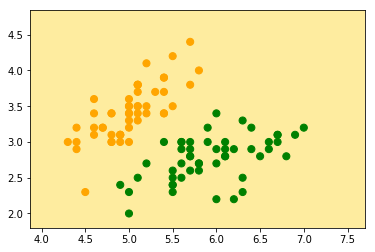

#20 [[ 0.72891149 -0.21307904]] [[0.078]] 0.5


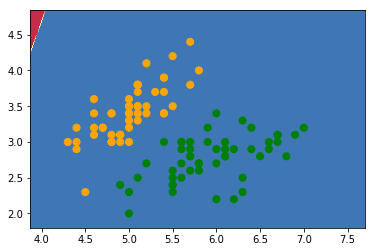

#40 [[ 0.88251149 -0.65637904]] [[0.031]] 0.43


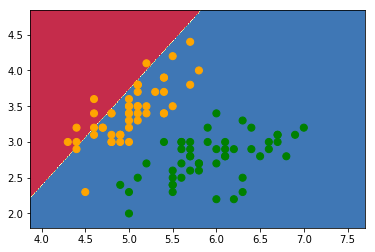

#48 [[ 0.83531149 -0.77777904]] [[0.011]] 0.0


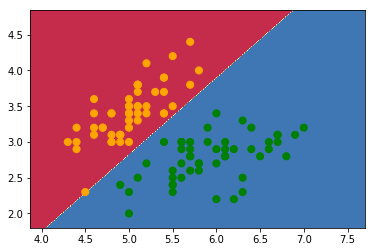

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [80]:
plt.figure()
slnIris = SLN(2,1)
slnIris.deltaTrain(X[:2,0:100],T[0:100],0.1,200,0.0)
slnIris.neuron(X[:2,:])

6. Probieren Sie in einem zweiten Versuch das zweite und dritte Merkmal/Attribut zur Klassifikation aus.

#0 [[0.91175894 0.44307865]] [[0.]] 0.5


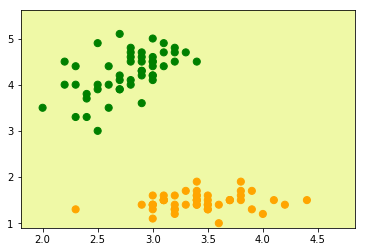

#20 [[0.35635894 0.40387865]] [[-0.127]] 0.03


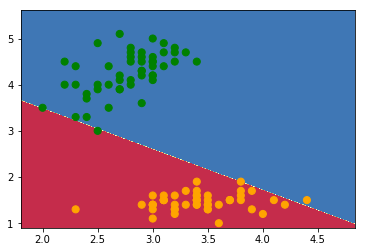

#22 [[0.35075894 0.40847865]] [[-0.127]] 0.02


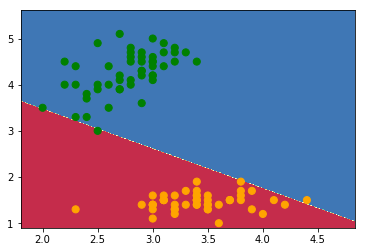

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [81]:
plt.figure()
slnIris = SLN(2,1)
slnIris.deltaTrain(X[1:3,0:100],T[0:100],0.1,200,0.02)
slnIris.neuron(X[1:3,:])

7. Optional: Implementieren Sie die Hebb-Regel als Methode `HebbTrain`, indem Sie Ihre Methode `DeltaTrain` kopieren und entsprechend anpassen. Probieren Sie die Hebb-Regel auf den UND-Daten aus.